### Deliverable 1: Preprocessing the Data for a Neural Network

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [32]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN" , "NAME"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [35]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [36]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

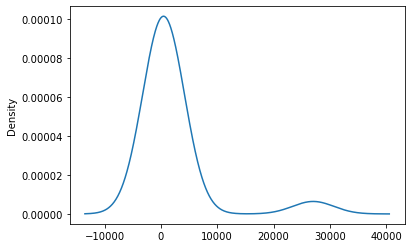

In [37]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [39]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [40]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1570        1
C2190        1
C1728        1
C8210        1
Name: CLASSIFICATION, Length: 71, dtype: int64

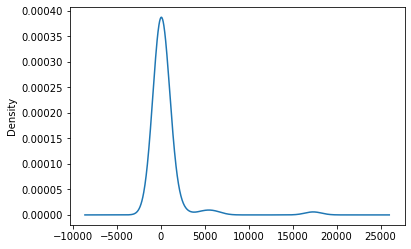

In [41]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [42]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [48]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [49]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [52]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [53]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 360       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [55]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [56]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
  640/25724 [..............................] - ETA: 31s - loss: 141325.7532 - accuracy: 0.4703
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1344/25724 [>.............................] - ETA: 15s - loss: 95424.5395 - accuracy: 0.4851 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2144/25724 [=>............................] - ETA: 10s - loss: 118230.8849 - accuracy: 0.4832
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3968/25724 [===>..........................] - ETA: 5s - loss: 76425.4852 - accuracy: 0.4796
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4800/25724 [====>.........................] - ETA: 4s - loss: 70510.3087 - accuracy: 0.4721
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5600/25724 [=====>........................] - ETA: 4s - loss: 63278.2580 - accuracy: 0.4704
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6368/25724 [======>.......................] - ETA: 3s - lo

 3232/25724 [==>...........................] - ETA: 1s - loss: 3182.3302 - accuracy: 0.5139
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4000/25724 [===>..........................] - ETA: 1s - loss: 3870.0247 - accuracy: 0.5145
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4896/25724 [====>.........................] - ETA: 1s - loss: 4291.7072 - accuracy: 0.5094
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 3707.1472 - accuracy: 0.5046
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 3234.4828 - accuracy: 0.4999
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 2887.7415 - accuracy: 0.5013
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8960/25724 [=========>....................] - ETA: 1s - loss: 2591.9027 - accuracy: 0.5002
Epoch 00003: s

 9280/25724 [=========>....................] - ETA: 1s - loss: 5574.2133 - accuracy: 0.4798
Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9984/25724 [==========>...................] - ETA: 1s - loss: 6029.7357 - accuracy: 0.4808
Epoch 00007: saving model to checkpoints/weights.07.hdf5
10752/25724 [===========>..................] - ETA: 1s - loss: 5696.3782 - accuracy: 0.4847
Epoch 00007: saving model to checkpoints/weights.07.hdf5
12352/25724 [=============>................] - ETA: 0s - loss: 5541.5770 - accuracy: 0.4895
Epoch 00007: saving model to checkpoints/weights.07.hdf5
13152/25724 [==============>...............] - ETA: 0s - loss: 5478.5523 - accuracy: 0.4904
Epoch 00007: saving model to checkpoints/weights.07.hdf5
13856/25724 [===============>..............] - ETA: 0s - loss: 5208.5275 - accuracy: 0.4947
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 4666.4725 - accuracy: 0.4984
Epoch 00007: s

14752/25724 [================>.............] - ETA: 0s - loss: 5339.4032 - accuracy: 0.4879
Epoch 00011: saving model to checkpoints/weights.11.hdf5
15424/25724 [================>.............] - ETA: 0s - loss: 5143.6901 - accuracy: 0.4898
Epoch 00011: saving model to checkpoints/weights.11.hdf5
16992/25724 [==================>...........] - ETA: 0s - loss: 4689.8069 - accuracy: 0.5008
Epoch 00011: saving model to checkpoints/weights.11.hdf5
17728/25724 [===================>..........] - ETA: 0s - loss: 4660.8469 - accuracy: 0.5045
Epoch 00011: saving model to checkpoints/weights.11.hdf5
18624/25724 [====================>.........] - ETA: 0s - loss: 4553.3760 - accuracy: 0.5089
Epoch 00011: saving model to checkpoints/weights.11.hdf5
19488/25724 [=====================>........] - ETA: 0s - loss: 4643.6285 - accuracy: 0.5100
Epoch 00011: saving model to checkpoints/weights.11.hdf5
20416/25724 [======================>.......] - ETA: 0s - loss: 4473.4926 - accuracy: 0.5124
Epoch 00011: s

20224/25724 [======================>.......] - ETA: 0s - loss: 9789.5730 - accuracy: 0.5485
Epoch 00015: saving model to checkpoints/weights.15.hdf5
21088/25724 [=======================>......] - ETA: 0s - loss: 9531.1144 - accuracy: 0.5488
Epoch 00015: saving model to checkpoints/weights.15.hdf5
21952/25724 [========================>.....] - ETA: 0s - loss: 9166.1220 - accuracy: 0.5498
Epoch 00015: saving model to checkpoints/weights.15.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 8820.0736 - accuracy: 0.5541
Epoch 00015: saving model to checkpoints/weights.15.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 8455.1999 - accuracy: 0.5588
Epoch 00015: saving model to checkpoints/weights.15.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 7844.8224 - accuracy: 0.5669
Epoch 16/100
   32/25724 [..............................] - ETA: 1s - loss: 35.5881 - accuracy: 0.5625
Epoch 00016: saving model to checkpoints/weights.16.h

23552/25724 [==========================>...] - ETA: 0s - loss: 9632.8347 - accuracy: 0.5487
Epoch 00017: saving model to checkpoints/weights.17.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 8899.8052 - accuracy: 0.5563
Epoch 00017: saving model to checkpoints/weights.17.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 8845.8457 - accuracy: 0.5573
Epoch 18/100
   32/25724 [..............................] - ETA: 2s - loss: 13.6430 - accuracy: 0.6875
Epoch 00018: saving model to checkpoints/weights.18.hdf5
  928/25724 [>.............................] - ETA: 1s - loss: 20.3957 - accuracy: 0.6433
Epoch 00018: saving model to checkpoints/weights.18.hdf5
 2912/25724 [==>...........................] - ETA: 1s - loss: 83.4994 - accuracy: 0.6549
Epoch 00018: saving model to checkpoints/weights.18.hdf5
 3776/25724 [===>..........................] - ETA: 1s - loss: 1155.0234 - accuracy: 0.6359
Epoch 00018: saving model to checkpoints/weights.18.hdf5


  960/25724 [>.............................] - ETA: 1s - loss: 46.7207 - accuracy: 0.6635
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 1856/25724 [=>............................] - ETA: 1s - loss: 28.1399 - accuracy: 0.6557
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 2752/25724 [==>...........................] - ETA: 1s - loss: 64.9437 - accuracy: 0.6403
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 3712/25724 [===>..........................] - ETA: 1s - loss: 312.5305 - accuracy: 0.6118
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 467.9112 - accuracy: 0.6060
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 6752/25724 [======>.......................] - ETA: 1s - loss: 407.8146 - accuracy: 0.6189
Epoch 00020: saving model to checkpoints/weights.20.hdf5
 7616/25724 [=======>......................] - ETA: 0s - loss: 423.1889 - accuracy: 0.6201
Epoch 00020: saving mode

 4576/25724 [====>.........................] - ETA: 1s - loss: 1789.6349 - accuracy: 0.5608
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 1549.5274 - accuracy: 0.5496
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 1319.4621 - accuracy: 0.5686
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 1179.0504 - accuracy: 0.5740
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 8576/25724 [=========>....................] - ETA: 0s - loss: 1182.9501 - accuracy: 0.5753
Epoch 00022: saving model to checkpoints/weights.22.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 1118.1559 - accuracy: 0.5747
Epoch 00022: saving model to checkpoints/weights.22.hdf5
11552/25724 [============>.................] - ETA: 0s - loss: 959.5787 - accuracy: 0.5901 
Epoch 00022: s

 8896/25724 [=========>....................] - ETA: 0s - loss: 1271.6498 - accuracy: 0.5333
Epoch 00024: saving model to checkpoints/weights.24.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 1203.5650 - accuracy: 0.5321
Epoch 00024: saving model to checkpoints/weights.24.hdf5
10592/25724 [===========>..................] - ETA: 0s - loss: 1211.5387 - accuracy: 0.5324
Epoch 00024: saving model to checkpoints/weights.24.hdf5
11488/25724 [============>.................] - ETA: 0s - loss: 1210.6599 - accuracy: 0.5340
Epoch 00024: saving model to checkpoints/weights.24.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 1145.7684 - accuracy: 0.5363
Epoch 00024: saving model to checkpoints/weights.24.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 1318.4026 - accuracy: 0.5327
Epoch 00024: saving model to checkpoints/weights.24.hdf5
15456/25724 [=================>............] - ETA: 0s - loss: 1359.2407 - accuracy: 0.5420
Epoch 00024: s

13984/25724 [===============>..............] - ETA: 0s - loss: 4156.2390 - accuracy: 0.5788
Epoch 00028: saving model to checkpoints/weights.28.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 3885.9484 - accuracy: 0.5841
Epoch 00028: saving model to checkpoints/weights.28.hdf5
16000/25724 [=================>............] - ETA: 0s - loss: 3645.3527 - accuracy: 0.5864
Epoch 00028: saving model to checkpoints/weights.28.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 3434.0987 - accuracy: 0.5923
Epoch 00028: saving model to checkpoints/weights.28.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 3287.1979 - accuracy: 0.5952
Epoch 00028: saving model to checkpoints/weights.28.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 3125.5500 - accuracy: 0.5931
Epoch 00028: saving model to checkpoints/weights.28.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 2986.0328 - accuracy: 0.5947
Epoch 00028: s

19584/25724 [=====================>........] - ETA: 0s - loss: 2775.8705 - accuracy: 0.5062
Epoch 00032: saving model to checkpoints/weights.32.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 2740.8422 - accuracy: 0.5028
Epoch 00032: saving model to checkpoints/weights.32.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 2809.7938 - accuracy: 0.5009
Epoch 00032: saving model to checkpoints/weights.32.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 2707.0616 - accuracy: 0.4994
Epoch 00032: saving model to checkpoints/weights.32.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 2655.3416 - accuracy: 0.4985
Epoch 00032: saving model to checkpoints/weights.32.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 2600.7012 - accuracy: 0.4965
Epoch 00032: saving model to checkpoints/weights.32.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 2508.1441 - accuracy: 0.4949
Epoch 3

 1760/25724 [=>............................] - ETA: 1s - loss: 0.6841 - accuracy: 0.5631
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 2656/25724 [==>...........................] - ETA: 1s - loss: 0.6840 - accuracy: 0.5617
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3584/25724 [===>..........................] - ETA: 1s - loss: 0.6826 - accuracy: 0.5739
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 4608/25724 [====>.........................] - ETA: 1s - loss: 0.6824 - accuracy: 0.5729
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 6624/25724 [======>.......................] - ETA: 1s - loss: 0.6825 - accuracy: 0.5735
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 7520/25724 [=======>......................] - ETA: 1s - loss: 0.6823 - accuracy: 0.5738
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 8384/25724 [========>.....................] - ETA: 0s - loss: 0.6824 - accuracy: 0.5724
Epoch 00037: saving model to checkp

 7072/25724 [=======>......................] - ETA: 1s - loss: 0.6286 - accuracy: 0.6649
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.6285 - accuracy: 0.6637
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 8800/25724 [=========>....................] - ETA: 0s - loss: 0.6290 - accuracy: 0.6619
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 9664/25724 [==========>...................] - ETA: 0s - loss: 0.6284 - accuracy: 0.6613
Epoch 00039: saving model to checkpoints/weights.39.hdf5
10560/25724 [===========>..................] - ETA: 0s - loss: 0.6276 - accuracy: 0.6632
Epoch 00039: saving model to checkpoints/weights.39.hdf5
12512/25724 [=============>................] - ETA: 0s - loss: 0.6280 - accuracy: 0.6606
Epoch 00039: saving model to checkpoints/weights.39.hdf5
13376/25724 [==============>...............] - ETA: 0s - loss: 0.6278 - accuracy: 0.6598
Epoch 00039: saving model to checkp

12064/25724 [=============>................] - ETA: 0s - loss: 0.6105 - accuracy: 0.6959
Epoch 00041: saving model to checkpoints/weights.41.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.6099 - accuracy: 0.6968
Epoch 00041: saving model to checkpoints/weights.41.hdf5
13760/25724 [===============>..............] - ETA: 0s - loss: 0.6098 - accuracy: 0.6967
Epoch 00041: saving model to checkpoints/weights.41.hdf5
14624/25724 [================>.............] - ETA: 0s - loss: 0.6094 - accuracy: 0.6969
Epoch 00041: saving model to checkpoints/weights.41.hdf5
15520/25724 [=================>............] - ETA: 0s - loss: 0.6094 - accuracy: 0.6966
Epoch 00041: saving model to checkpoints/weights.41.hdf5
16384/25724 [==================>...........] - ETA: 0s - loss: 0.6091 - accuracy: 0.6969
Epoch 00041: saving model to checkpoints/weights.41.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.6081 - accuracy: 0.6984
Epoch 00041: saving model to checkp

16448/25724 [==================>...........] - ETA: 0s - loss: 0.6039 - accuracy: 0.6971
Epoch 00043: saving model to checkpoints/weights.43.hdf5
17312/25724 [===================>..........] - ETA: 0s - loss: 0.6030 - accuracy: 0.6982
Epoch 00043: saving model to checkpoints/weights.43.hdf5
18208/25724 [====================>.........] - ETA: 0s - loss: 0.6039 - accuracy: 0.6974
Epoch 00043: saving model to checkpoints/weights.43.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 0.6034 - accuracy: 0.6977
Epoch 00043: saving model to checkpoints/weights.43.hdf5
20224/25724 [======================>.......] - ETA: 0s - loss: 0.6028 - accuracy: 0.6984
Epoch 00043: saving model to checkpoints/weights.43.hdf5
22240/25724 [========================>.....] - ETA: 0s - loss: 0.6025 - accuracy: 0.6992
Epoch 00043: saving model to checkpoints/weights.43.hdf5
22560/25724 [=========================>....] - ETA: 0s - loss: 0.6028 - accuracy: 0.6990
Epoch 00043: saving model to checkp

21984/25724 [========================>.....] - ETA: 0s - loss: 0.6934 - accuracy: 0.6611
Epoch 00045: saving model to checkpoints/weights.45.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.6943 - accuracy: 0.6560
Epoch 00045: saving model to checkpoints/weights.45.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.6952 - accuracy: 0.6509
Epoch 00045: saving model to checkpoints/weights.45.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.6962 - accuracy: 0.6457
Epoch 00045: saving model to checkpoints/weights.45.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.6964 - accuracy: 0.6411
Epoch 46/100
   32/25724 [..............................] - ETA: 2s - loss: 0.7190 - accuracy: 0.5000
Epoch 00046: saving model to checkpoints/weights.46.hdf5
  832/25724 [..............................] - ETA: 1s - loss: 0.7003 - accuracy: 0.5397
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 1696/25724 [>.

Epoch 48/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00048: saving model to checkpoints/weights.48.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5405
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.6884 - accuracy: 0.5513
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 2528/25724 [=>............................] - ETA: 1s - loss: 0.6889 - accuracy: 0.5483
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 3392/25724 [==>...........................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5436
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 4288/25724 [====>.........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 6240/25724 [======>.......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00048: saving mo

 7968/25724 [========>.....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5271
Epoch 00052: saving model to checkpoints/weights.52.hdf5
 8864/25724 [=========>....................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5278
Epoch 00052: saving model to checkpoints/weights.52.hdf5
10848/25724 [===========>..................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5278
Epoch 00052: saving model to checkpoints/weights.52.hdf5
11712/25724 [============>.................] - ETA: 0s - loss: 0.6915 - accuracy: 0.5289
Epoch 00052: saving model to checkpoints/weights.52.hdf5
12576/25724 [=============>................] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 00052: saving model to checkpoints/weights.52.hdf5
13408/25724 [==============>...............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 00052: saving model to checkpoints/weights.52.hdf5
14240/25724 [===============>..............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00052: saving model to checkp

13664/25724 [==============>...............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00054: saving model to checkpoints/weights.54.hdf5
14528/25724 [===============>..............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00054: saving model to checkpoints/weights.54.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 00054: saving model to checkpoints/weights.54.hdf5
16224/25724 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00054: saving model to checkpoints/weights.54.hdf5
17088/25724 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00054: saving model to checkpoints/weights.54.hdf5
17952/25724 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00054: saving model to checkpoints/weights.54.hdf5
18880/25724 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00054: saving model to checkp

18528/25724 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5309
Epoch 00056: saving model to checkpoints/weights.56.hdf5
19360/25724 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00056: saving model to checkpoints/weights.56.hdf5
20192/25724 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00056: saving model to checkpoints/weights.56.hdf5
21056/25724 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 00056: saving model to checkpoints/weights.56.hdf5
21920/25724 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00056: saving model to checkpoints/weights.56.hdf5
22752/25724 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00056: saving model to checkpoints/weights.56.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00056: saving model to checkp

22816/25724 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00058: saving model to checkpoints/weights.58.hdf5
23648/25724 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00058: saving model to checkpoints/weights.58.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00058: saving model to checkpoints/weights.58.hdf5
25724/25724 [==============================] - 2s 58us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 59/100
   32/25724 [..............................] - ETA: 2s - loss: 0.6954 - accuracy: 0.5000
Epoch 00059: saving model to checkpoints/weights.59.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5234
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 2784/25724 [==>...........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 3648/25724 [==

  896/25724 [>.............................] - ETA: 1s - loss: 0.6943 - accuracy: 0.5067
Epoch 00061: saving model to checkpoints/weights.61.hdf5
 1760/25724 [=>............................] - ETA: 1s - loss: 0.6936 - accuracy: 0.5114
Epoch 00061: saving model to checkpoints/weights.61.hdf5
 2624/25724 [==>...........................] - ETA: 1s - loss: 0.6941 - accuracy: 0.5072
Epoch 00061: saving model to checkpoints/weights.61.hdf5
 4576/25724 [====>.........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5251
Epoch 00061: saving model to checkpoints/weights.61.hdf5
 5440/25724 [=====>........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5244
Epoch 00061: saving model to checkpoints/weights.61.hdf5
 6272/25724 [======>.......................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5238
Epoch 00061: saving model to checkpoints/weights.61.hdf5
 7104/25724 [=======>......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5252
Epoch 00061: saving model to checkp

 6368/25724 [======>.......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 00063: saving model to checkpoints/weights.63.hdf5
 7232/25724 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 00063: saving model to checkpoints/weights.63.hdf5
 8064/25724 [========>.....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 00063: saving model to checkpoints/weights.63.hdf5
 8896/25724 [=========>....................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00063: saving model to checkpoints/weights.63.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00063: saving model to checkpoints/weights.63.hdf5
10592/25724 [===========>..................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00063: saving model to checkpoints/weights.63.hdf5
12480/25724 [=============>................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00063: saving model to checkp

10432/25724 [===========>..................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00065: saving model to checkpoints/weights.65.hdf5
11296/25724 [============>.................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00065: saving model to checkpoints/weights.65.hdf5
13280/25724 [==============>...............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00065: saving model to checkpoints/weights.65.hdf5
14112/25724 [===============>..............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00065: saving model to checkpoints/weights.65.hdf5
14944/25724 [================>.............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00065: saving model to checkpoints/weights.65.hdf5
15808/25724 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00065: saving model to checkpoints/weights.65.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00065: saving model to checkp

15904/25724 [=================>............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00067: saving model to checkpoints/weights.67.hdf5
16736/25724 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00067: saving model to checkpoints/weights.67.hdf5
17600/25724 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00067: saving model to checkpoints/weights.67.hdf5
18464/25724 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00067: saving model to checkpoints/weights.67.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00067: saving model to checkpoints/weights.67.hdf5
21216/25724 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 00067: saving model to checkpoints/weights.67.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00067: saving model to checkp

20512/25724 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00069: saving model to checkpoints/weights.69.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00069: saving model to checkpoints/weights.69.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00069: saving model to checkpoints/weights.69.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00069: saving model to checkpoints/weights.69.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00069: saving model to checkpoints/weights.69.hdf5
25724/25724 [==============================] - 2s 60us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 70/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00070: saving model to checkpoints/weights.70.hdf5
  800/25724 [..

25724/25724 [==============================] - 2s 59us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 72/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6874 - accuracy: 0.5625
Epoch 00072: saving model to checkpoints/weights.72.hdf5
  832/25724 [..............................] - ETA: 1s - loss: 0.6932 - accuracy: 0.5144
Epoch 00072: saving model to checkpoints/weights.72.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 00072: saving model to checkpoints/weights.72.hdf5
 2496/25724 [=>............................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5244
Epoch 00072: saving model to checkpoints/weights.72.hdf5
 3328/25724 [==>...........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5258
Epoch 00072: saving model to checkpoints/weights.72.hdf5
 5216/25724 [=====>........................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5205
Epoch 00072: saving model to checkpoints/weights.72.hdf5
 6048/25724 [==

 3552/25724 [===>..........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5436
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 4352/25724 [====>.........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5432
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 5152/25724 [=====>........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5429
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 6048/25724 [======>.......................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5407
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 8032/25724 [========>.....................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5403
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 8896/25724 [=========>....................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5388
Epoch 00074: saving model to checkpoints/weights.74.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.6904 - accuracy: 0.5377
Epoch 00074: saving model to checkp

 7872/25724 [========>.....................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5414
Epoch 00076: saving model to checkpoints/weights.76.hdf5
 9824/25724 [==========>...................] - ETA: 0s - loss: 0.6896 - accuracy: 0.5434
Epoch 00076: saving model to checkpoints/weights.76.hdf5
10688/25724 [===========>..................] - ETA: 0s - loss: 0.6900 - accuracy: 0.5409
Epoch 00076: saving model to checkpoints/weights.76.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.6900 - accuracy: 0.5409
Epoch 00076: saving model to checkpoints/weights.76.hdf5
12384/25724 [=============>................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5386
Epoch 00076: saving model to checkpoints/weights.76.hdf5
13248/25724 [==============>...............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5362
Epoch 00076: saving model to checkpoints/weights.76.hdf5
14144/25724 [===============>..............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5359
Epoch 00076: saving model to checkp

12800/25724 [=============>................] - ETA: 0s - loss: 0.6905 - accuracy: 0.5365
Epoch 00078: saving model to checkpoints/weights.78.hdf5
14688/25724 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00078: saving model to checkpoints/weights.78.hdf5
15520/25724 [=================>............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00078: saving model to checkpoints/weights.78.hdf5
16352/25724 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00078: saving model to checkpoints/weights.78.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 00078: saving model to checkpoints/weights.78.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00078: saving model to checkpoints/weights.78.hdf5
18912/25724 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00078: saving model to checkp

18496/25724 [====================>.........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5362
Epoch 00080: saving model to checkpoints/weights.80.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5358
Epoch 00080: saving model to checkpoints/weights.80.hdf5
20192/25724 [======================>.......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00080: saving model to checkpoints/weights.80.hdf5
21056/25724 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 00080: saving model to checkpoints/weights.80.hdf5
21920/25724 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00080: saving model to checkpoints/weights.80.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 00080: saving model to checkpoints/weights.80.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00080: saving model to checkp

22784/25724 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00082: saving model to checkpoints/weights.82.hdf5
23616/25724 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00082: saving model to checkpoints/weights.82.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00082: saving model to checkpoints/weights.82.hdf5
25724/25724 [==============================] - 2s 58us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 83/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6986 - accuracy: 0.4688
Epoch 00083: saving model to checkpoints/weights.83.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5394
Epoch 00083: saving model to checkpoints/weights.83.hdf5
 2784/25724 [==>...........................] - ETA: 1s - loss: 0.6893 - accuracy: 0.5463
Epoch 00083: saving model to checkpoints/weights.83.hdf5
 3648/25724 [==

  864/25724 [>.............................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 00085: saving model to checkpoints/weights.85.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5360
Epoch 00085: saving model to checkpoints/weights.85.hdf5
 3552/25724 [===>..........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 00085: saving model to checkpoints/weights.85.hdf5
 4384/25724 [====>.........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00085: saving model to checkpoints/weights.85.hdf5
 5248/25724 [=====>........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 00085: saving model to checkpoints/weights.85.hdf5
 6112/25724 [======>.......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 00085: saving model to checkpoints/weights.85.hdf5
 6944/25724 [=======>......................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5357
Epoch 00085: saving model to checkp

 5504/25724 [=====>........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5253
Epoch 00087: saving model to checkpoints/weights.87.hdf5
 7392/25724 [=======>......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 00087: saving model to checkpoints/weights.87.hdf5
 8224/25724 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 00087: saving model to checkpoints/weights.87.hdf5
 9056/25724 [=========>....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 00087: saving model to checkpoints/weights.87.hdf5
 9888/25724 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 00087: saving model to checkpoints/weights.87.hdf5
10752/25724 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5357
Epoch 00087: saving model to checkpoints/weights.87.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00087: saving model to checkp

10496/25724 [===========>..................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5385
Epoch 00089: saving model to checkpoints/weights.89.hdf5
11360/25724 [============>.................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5385
Epoch 00089: saving model to checkpoints/weights.89.hdf5
13280/25724 [==============>...............] - ETA: 0s - loss: 0.6902 - accuracy: 0.5389
Epoch 00089: saving model to checkpoints/weights.89.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5379
Epoch 00089: saving model to checkpoints/weights.89.hdf5
14912/25724 [================>.............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5374
Epoch 00089: saving model to checkpoints/weights.89.hdf5
15776/25724 [=================>............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5378
Epoch 00089: saving model to checkpoints/weights.89.hdf5
16672/25724 [==================>...........] - ETA: 0s - loss: 0.6903 - accuracy: 0.5381
Epoch 00089: saving model to checkp

15104/25724 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00091: saving model to checkpoints/weights.91.hdf5
17088/25724 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00091: saving model to checkpoints/weights.91.hdf5
17952/25724 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00091: saving model to checkpoints/weights.91.hdf5
18784/25724 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00091: saving model to checkpoints/weights.91.hdf5
19616/25724 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00091: saving model to checkpoints/weights.91.hdf5
20448/25724 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00091: saving model to checkpoints/weights.91.hdf5
21312/25724 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00091: saving model to checkp

20000/25724 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00093: saving model to checkpoints/weights.93.hdf5
21952/25724 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00093: saving model to checkpoints/weights.93.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00093: saving model to checkpoints/weights.93.hdf5
23648/25724 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00093: saving model to checkpoints/weights.93.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00093: saving model to checkpoints/weights.93.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 94/100
   32/25724 [..............................] - ETA: 2s - loss: 0.7002 - accuracy: 0.4688
Epoch 00094: saving model to checkpoints/weights.94.hdf5
  864/25724 [>.

25724/25724 [==============================] - 2s 59us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 96/100
   32/25724 [..............................] - ETA: 2s - loss: 0.6720 - accuracy: 0.6875
Epoch 00096: saving model to checkpoints/weights.96.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5405
Epoch 00096: saving model to checkpoints/weights.96.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00096: saving model to checkpoints/weights.96.hdf5
 2528/25724 [=>............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00096: saving model to checkpoints/weights.96.hdf5
 3392/25724 [==>...........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00096: saving model to checkpoints/weights.96.hdf5
 4256/25724 [===>..........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5251
Epoch 00096: saving model to checkpoints/weights.96.hdf5
 6240/25724 [==

 3520/25724 [===>..........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 4352/25724 [====>.........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 5216/25724 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 6976/25724 [=======>......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 8640/25724 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 00098: saving model to checkpoints/weights.98.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00098: saving model to checkp

In [57]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.8126 - accuracy: 0.7130
Loss: 0.8842182613670304, Accuracy: 0.7130029201507568


In [60]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

# Import the model to a new object
nn_imported = tf.keras.models.load_model('AlphabetSoupCharity.h5')